# U-Net Semantic Segmentation Training Dataset
### QCar2 Autonomous Driving - Lane Segmentation

Este notebook demuestra:
- Carga del dataset preparado
- Visualización de máscaras de segmentación
- Overlay de segmentación sobre imágenes originales

## 1. Setup e Imports

In [1]:
!ls
!cd qcar2_LaneSeg-ACC/train_unet
!ls

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
import sys
import os
dir=sys.path.append("qcar2_LaneSeg-ACC/train_unet")
!ls
# Import local modules
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Imports successful!")
print(f"Number of classes: {config.NUM_CLASSES}")

isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
✅ Imports successful!
Number of classes: 4


## 2. Class Configuration

In [3]:
# Display class mapping
print("Semantic Segmentation Classes:\n")
for class_id in range(config.NUM_CLASSES):
    class_name = config.get_class_name(class_id)
    color_rgb = config.get_class_color(class_id, bgr=False)
    print(f"  Clase {class_id}: {class_name}")
    print(f"    RGB: {color_rgb}\n")

Semantic Segmentation Classes:

  Clase 0: Fondo / Vereda / Obstáculos
    RGB: (0, 0, 0)

  Clase 1: Camino / Asfalto transitable
    RGB: (0, 0, 255)

  Clase 2: Líneas de tráfico
    RGB: (255, 255, 0)

  Clase 3: Bordes de camino
    RGB: (255, 0, 0)



## 3. Color Legend Visualization

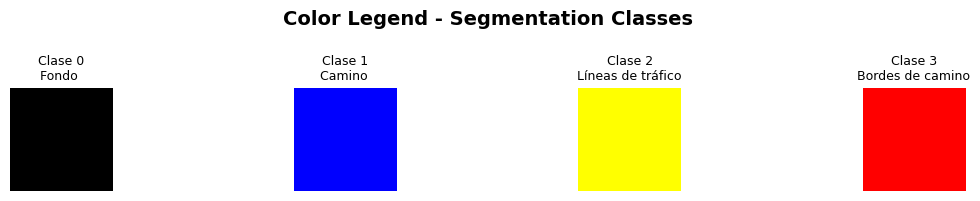

In [4]:
# Create color legend
fig, axes = plt.subplots(1, config.NUM_CLASSES, figsize=(12, 2))

for class_id in range(config.NUM_CLASSES):
    color_rgb = config.get_class_color(class_id, bgr=False)
    class_name = config.get_class_name(class_id)
    
    # Create solid color patch
    color_patch = np.ones((50, 50, 3), dtype=np.uint8)
    color_patch[:, :] = color_rgb
    
    # Display
    axes[class_id].imshow(color_patch)
    axes[class_id].set_title(f"Clase {class_id}\n{class_name.split('/')[0]}", fontsize=9)
    axes[class_id].axis('off')

plt.suptitle('Color Legend - Segmentation Classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Load Dataset

In [5]:
# Dataset paths
print(dir)
!ls
dataset_base = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")

train_images_path = dataset_base / 'train' / 'images'
train_masks_path = dataset_base / 'train' / 'masks'

# Get list of files
if train_images_path.exists():
    image_files = sorted(list(train_images_path.glob('*.png')))
    mask_files = sorted(list(train_masks_path.glob('*.png')))
    
    print(f"📁 Found {len(image_files)} training images")
    print(f"📁 Found {len(mask_files)} training masks")
    
    if len(image_files) != len(mask_files):
        print("⚠️  Warning: Number of images and masks do not match!")
else:
    print("❌ Dataset not found! Run prepare_dataset.py first.")
    image_files = []
    mask_files = []

None
isaac_ros_common	      isaac_ros_nitros	    qcar2_LaneSeg-ACC
isaac_ros_dnn_inference       qcar2_autonomy	    qcar2_nodes
isaac_ros_image_pipeline      qcar2_interfaces	    teleop_twist_keyboard
isaac_ros_image_segmentation  qcar2_lane_following
📁 Found 5 training images
📁 Found 5 training masks


## 5. Visualize Random Sample

Sample 1: img_00001.png
Image shape: (480, 640, 3)
Mask shape: (480, 640)
Classes present: [0 1 2 3]


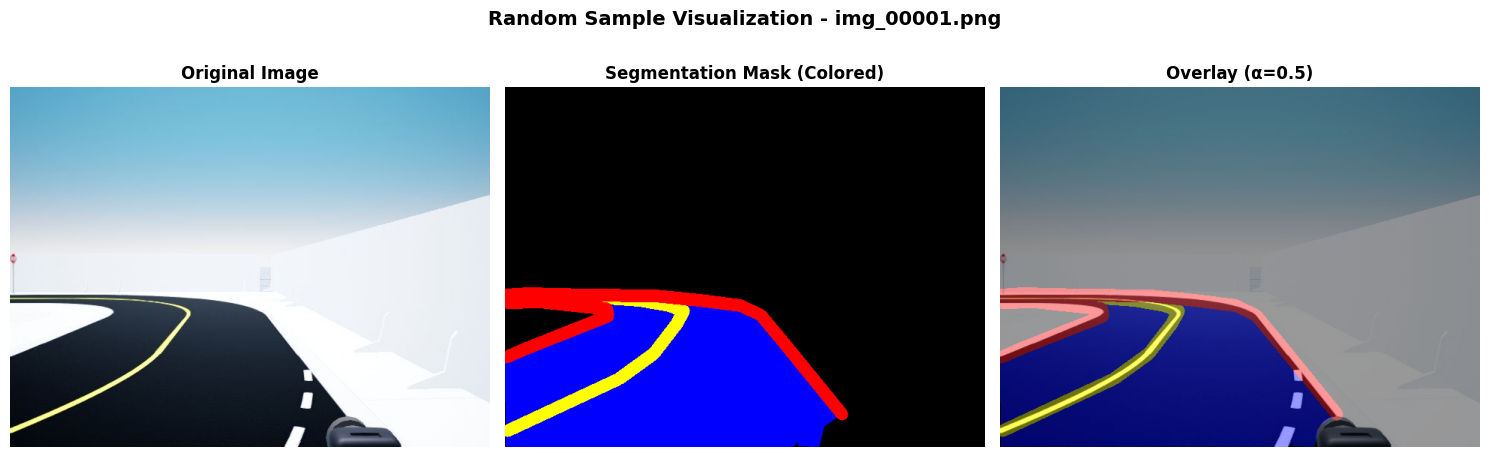

In [6]:
if image_files:
    # Select random sample
    idx = random.randint(0, len(image_files) - 1)
    
    # Load image and mask
    image = cv2.imread(str(image_files[idx]))
    mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
    
    # Check unique classes in this mask
    unique_classes = np.unique(mask)
    print(f"Sample {idx + 1}: {image_files[idx].name}")
    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Classes present: {unique_classes}")
    
    # Create visualizations
    colored_mask = visualize_mask(mask, use_colors=True)
    overlay = overlay_mask_on_image(image, mask, alpha=0.4)
    
    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')
    
    # Colored mask
    axes[1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Segmentation Mask (Colored)', fontsize=12, fontweight='bold')
    axes[1].axis('off')
    
    # Overlay
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay (α=0.5)', fontsize=12, fontweight='bold')
    axes[2].axis('off')
    
    plt.suptitle(f'Random Sample Visualization - {image_files[idx].name}', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No images to display")

## 6. Class Distribution Analysis

Analyzing class distribution...


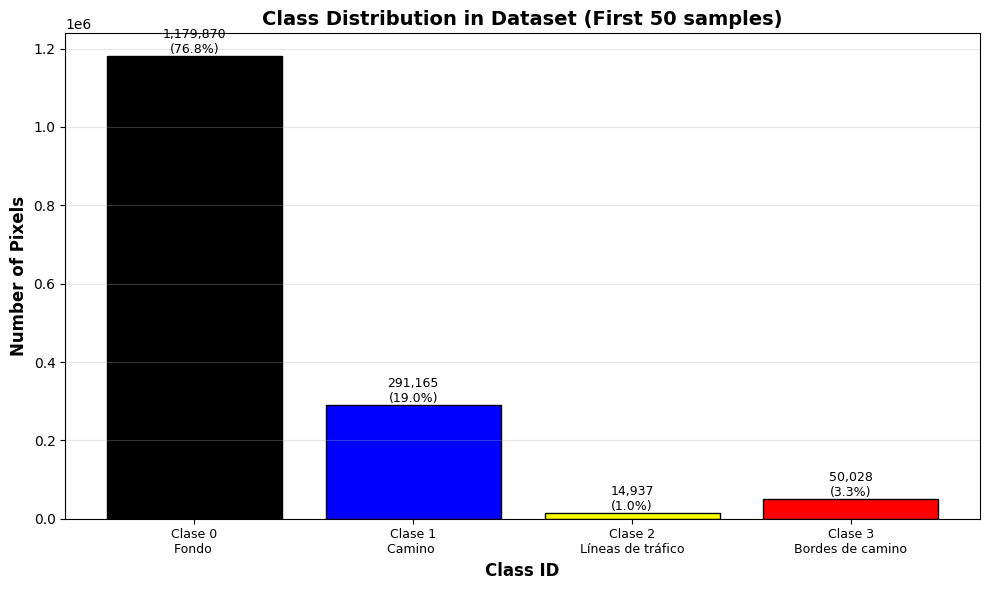


Class Distribution Summary:
  Clase 0: 1,179,870 pixels (76.81%)
  Clase 1: 291,165 pixels (18.96%)
  Clase 2: 14,937 pixels (0.97%)
  Clase 3: 50,028 pixels (3.26%)


In [7]:
if mask_files:
    # Count pixels per class across all masks
    class_counts = np.zeros(config.NUM_CLASSES, dtype=np.int64)
    
    print("Analyzing class distribution...")
    for mask_file in mask_files[:50]:  # Analyze first 50 for speed
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)
        for class_id in range(config.NUM_CLASSES):
            class_counts[class_id] += np.sum(mask == class_id)
    
    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = []
    labels = []
    for class_id in range(config.NUM_CLASSES):
        color_rgb = np.array(config.get_class_color(class_id, bgr=False)) / 255.0
        colors.append(color_rgb)
        labels.append(f"Clase {class_id}\n{config.get_class_name(class_id).split('/')[0]}")
    
    bars = ax.bar(range(config.NUM_CLASSES), class_counts, color=colors, edgecolor='black')
    ax.set_xlabel('Class ID', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Pixels', fontsize=12, fontweight='bold')
    ax.set_title('Class Distribution in Dataset (First 50 samples)', fontsize=14, fontweight='bold')
    ax.set_xticks(range(config.NUM_CLASSES))
    ax.set_xticklabels(labels, fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, class_counts)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/class_counts.sum()*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\nClass Distribution Summary:")
    for class_id in range(config.NUM_CLASSES):
        percentage = class_counts[class_id] / class_counts.sum() * 100
        print(f"  Clase {class_id}: {class_counts[class_id]:,} pixels ({percentage:.2f}%)")
else:
    print("❌ No masks to analyze")

## 7. Multiple Random Samples Grid

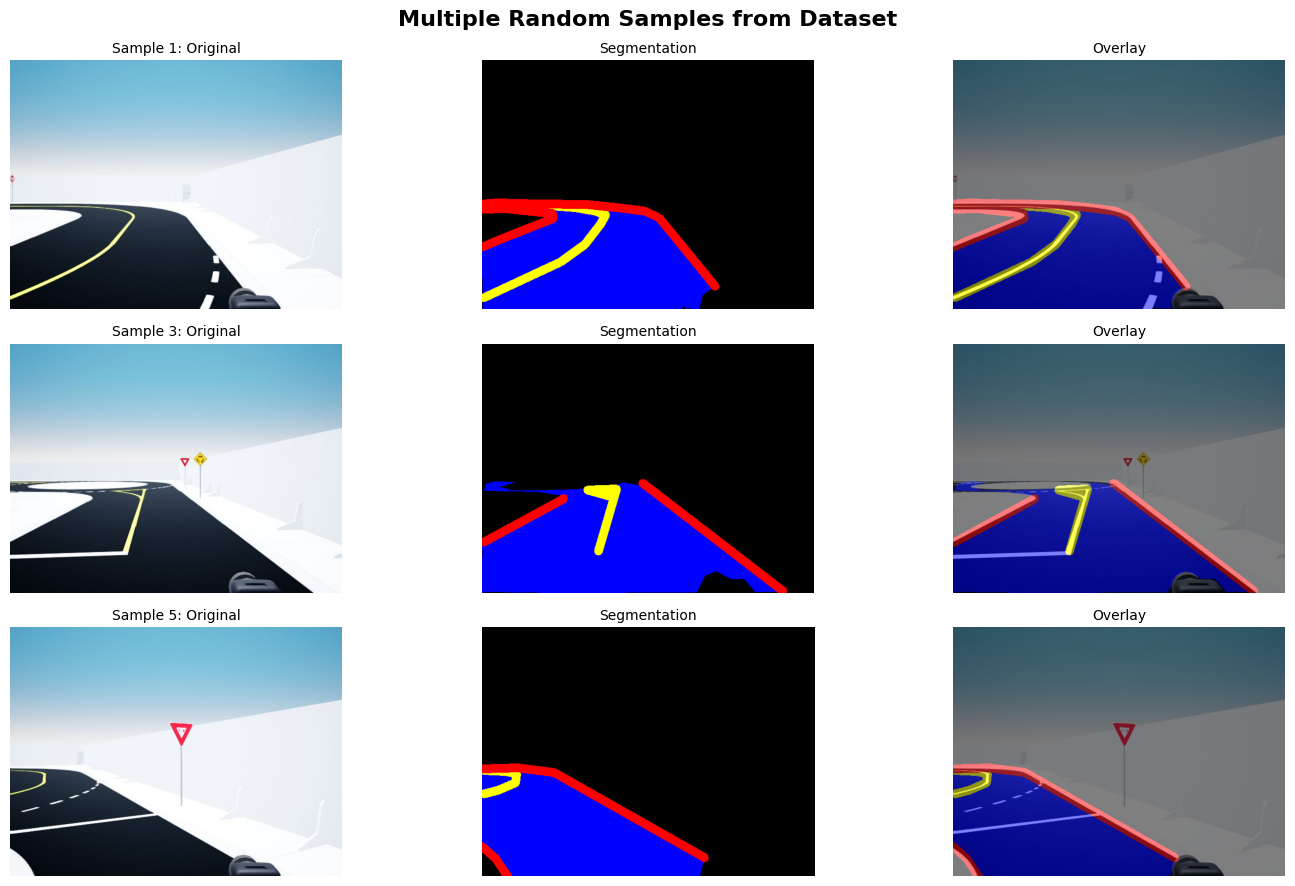

In [8]:
if image_files and len(image_files) >= 2:
    # Select 6 random samples
    num_samples = 3
    random_indices = random.sample(range(len(image_files)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 3))
    
    for i, idx in enumerate(random_indices):
        # Load data
        image = cv2.imread(str(image_files[idx]))
        mask = cv2.imread(str(mask_files[idx]), cv2.IMREAD_GRAYSCALE)
        
        # Create visualizations
        colored_mask = visualize_mask(mask, use_colors=True)
        overlay = overlay_mask_on_image(image, mask, alpha=0.5)
        
        # Plot row
        axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Sample {idx + 1}: Original', fontsize=10)
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Segmentation', fontsize=10)
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Overlay', fontsize=10)
        axes[i, 2].axis('off')
    
    plt.suptitle('Multiple Random Samples from Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Not enough images for grid visualization")

## 8. Dataset Summary

In [9]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)

if image_files:
    sample_image = cv2.imread(str(image_files[0]))
    height, width = sample_image.shape[:2]
    
    print(f"\n📊 Dataset Statistics:")
    print(f"  Training samples: {len(image_files)}")
    print(f"  Image dimensions: {width}x{height}")
    print(f"  Number of classes: {config.NUM_CLASSES}")
    print(f"\n🎨 Color Mapping:")
    for class_id in range(config.NUM_CLASSES):
        name = config.get_class_name(class_id)
        color = config.get_class_color(class_id, bgr=False)
        print(f"  Clase {class_id}: {name} → RGB{color}")
    print(f"\n💡 Tip: Use these functions for visualization:")
    print(f"  - visualize_mask(mask, use_colors=True)")
    print(f"  - overlay_mask_on_image(image, mask, alpha=0.5)")
else:
    print("\n❌ No dataset found. Run prepare_dataset.py first.")

print("\n" + "="*60)

DATASET SUMMARY

📊 Dataset Statistics:
  Training samples: 5
  Image dimensions: 640x480
  Number of classes: 4

🎨 Color Mapping:
  Clase 0: Fondo / Vereda / Obstáculos → RGB(0, 0, 0)
  Clase 1: Camino / Asfalto transitable → RGB(0, 0, 255)
  Clase 2: Líneas de tráfico → RGB(255, 255, 0)
  Clase 3: Bordes de camino → RGB(255, 0, 0)

💡 Tip: Use these functions for visualization:
  - visualize_mask(mask, use_colors=True)
  - overlay_mask_on_image(image, mask, alpha=0.5)



## TRAIN_UNET

In [10]:
# ============================================================================
# CELDA 1: IMPORTS
# Copiar/pegar esta celda al inicio del notebook después de las celdas existentes
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from tqdm import tqdm
import sys
import os

# Agregar path al módulo local
sys.path.append('.')

# Importar módulos locales
import config
from prepare_dataset import visualize_mask, overlay_mask_on_image

# Configurar semillas para reproducibilidad
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("✅ Imports exitosos!")


✅ Imports exitosos!


In [11]:
# ============================================================================
# CELDA 2: HIPERPARÁMETROS
# ============================================================================

# Hiperparámetros de entrenamiento
BATCH_SIZE = 2
LEARNING_RATE = 1e-4
NUM_EPOCHS = 20  # Ajustable entre 20-50

# Dimensiones de imagen (CRÍTICO para Isaac ROS)
IMAGE_HEIGHT = 480
IMAGE_WIDTH = 640

# Número de clases de segmentación  
NUM_CLASSES = 4

# Dispositivo (GPU si está disponible)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Rutas de datos
DATASET_BASE = Path("qcar2_LaneSeg-ACC/train_unet/training_data/dataset_images")
TRAIN_IMAGES_PATH = DATASET_BASE / 'train' / 'images'
TRAIN_MASKS_PATH = DATASET_BASE / 'train' / 'masks'
VAL_IMAGES_PATH = DATASET_BASE / 'val' / 'images'
VAL_MASKS_PATH = DATASET_BASE / 'val' / 'masks'

# Pesos de clase para CrossEntropyLoss
# [fondo, camino, líneas, bordes]
CLASS_WEIGHTS = torch.tensor([0.1, 1.0, 10.0, 1.0]).to(DEVICE)

print(f"✅ Configuración:")
print(f"   - Device: {DEVICE}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Learning rate: {LEARNING_RATE}")
print(f"   - Épocas: {NUM_EPOCHS}")
print(f"   - Resolución: {IMAGE_WIDTH}x{IMAGE_HEIGHT}")
print(f"   - Clases: {NUM_CLASSES}")


✅ Configuración:
   - Device: cuda
   - Batch size: 2
   - Learning rate: 0.0001
   - Épocas: 20
   - Resolución: 640x480
   - Clases: 4


In [12]:
# ============================================================================
# CELDA 3: DATASET Y DATALOADERS
# ============================================================================

class SegmentationDataset(Dataset):
    """
    Dataset personalizado para segmentación semántica de carriles.
    
    Args:
        images_dir: Directorio con imágenes RGB
        masks_dir: Directorio con máscaras de segmentación
        transform: Transformaciones a aplicar (opcional)
    """
    
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = Path(images_dir)
        self.masks_dir = Path(masks_dir)
        self.transform = transform
        
        # Listar archivos de imágenes
        self.image_files = sorted(list(self.images_dir.glob('*.png')))
        self.mask_files = sorted(list(self.masks_dir.glob('*.png')))
        
        # Verificar que coincidan
        assert len(self.image_files) == len(self.mask_files), \
            f"Número de imágenes ({len(self.image_files)}) != número de máscaras ({len(self.mask_files)})"
        
        print(f"✅ Dataset inicializado: {len(self.image_files)} muestras")
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Cargar imagen (RGB)
        image_path = self.image_files[idx]
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB
        
        # Cargar máscara (escala de grises)
        mask_path = self.mask_files[idx]
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
        
        # Aplicar transformaciones
        if self.transform:
            # Resize obligatorio a 640x480 (Isaac ROS)
            image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                             interpolation=cv2.INTER_LINEAR)
            mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT), 
                            interpolation=cv2.INTER_NEAREST)
        
        # Normalizar imagen a [0, 1]
        image = image.astype(np.float32) / 255.0
        
        # Convertir a tensores
        image = torch.from_numpy(image).permute(2, 0, 1)  # HWC -> CHW
        mask = torch.from_numpy(mask).long()  # Importante: usar long/int64
        
        return image, mask


# Crear datasets
print("\n📂 Creando datasets...")
train_dataset = SegmentationDataset(TRAIN_IMAGES_PATH, TRAIN_MASKS_PATH, transform=True)
val_dataset = SegmentationDataset(VAL_IMAGES_PATH, VAL_MASKS_PATH, transform=True)

# Crear dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"✅ DataLoaders creados:")
print(f"   - Train batches: {len(train_loader)}")
print(f"   - Val batches: {len(val_loader)}")



📂 Creando datasets...
✅ Dataset inicializado: 5 muestras
✅ Dataset inicializado: 1 muestras
✅ DataLoaders creados:
   - Train batches: 3
   - Val batches: 1


In [13]:
# ============================================================================
# CELDA 4: MODELO OPTIMIZED U-NET
# ============================================================================

class DoubleConv(nn.Module):
    """Bloque de doble convolución: (Conv -> BatchNorm -> ReLU) x 2"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Bloque de downsampling: MaxPool -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    
    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Bloque de upsampling: ConvTranspose -> Concat -> DoubleConv"""
    
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    
    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # Asegurar dimensiones compatibles para concatenación
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                       diffY // 2, diffY - diffY // 2])
        
        # Concatenar con skip connection
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OptimizedUNet(nn.Module):
    """
    Arquitectura U-Net optimizada para segmentación semántica de carriles.
    
    Args:
        in_channels: Número de canales de entrada (3 para RGB)
        num_classes: Número de clases de segmentación (4: fondo, camino, líneas, bordes)
    """
    
    def __init__(self, in_channels=3, num_classes=4):
        super().__init__()
        
        # Encoder (contracting path)
        self.inc = DoubleConv(in_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        
        # Bottleneck (Cuello de botella)
        self.down4 = Down(512, 512)
        
        # Decoder (expansive path) - AJUSTADO CON PARCHES DE CANALES
        
        # up1: Recibe 512. Upsample a 256. Concatena con down3 (512). Total entrada = 768
        self.up1 = Up(512, 256)
        self.up1.conv = DoubleConv(768, 256) # Parche manual
        
        # up2: Recibe 256. Upsample a 128. Concatena con down2 (256). Total entrada = 384
        self.up2 = Up(256, 128)
        self.up2.conv = DoubleConv(384, 128) # Parche manual

        # up3: Recibe 128. Upsample a 64. Concatena con down1 (128). Total entrada = 192
        self.up3 = Up(128, 64)
        self.up3.conv = DoubleConv(192, 64) # Parche manual

        # up4: Recibe 64. Upsample a 32. Concatena con inc (64). Total entrada = 96
        self.up4 = Up(64, 64)
        self.up4.conv = DoubleConv(96, 64) # Parche manual
        
        # Capa final de clasificación
        self.outc = nn.Conv2d(64, num_classes, kernel_size=1)
    
    def forward(self, x):
        # Encoder
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        
        # Decoder con skip connections
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        
        # Salida
        logits = self.outc(x)
        return logits


# Crear modelo y mover a dispositivo
print("\n🧠 Creando modelo OptimizedUNet...")
model = OptimizedUNet(in_channels=3, num_classes=NUM_CLASSES).to(DEVICE)

# Contar parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"✅ Modelo creado:")
print(f"   - Parámetros totales: {total_params:,}")
print(f"   - Parámetros entrenables: {trainable_params:,}")



🧠 Creando modelo OptimizedUNet...
✅ Modelo creado:
   - Parámetros totales: 13,295,780
   - Parámetros entrenables: 13,295,780


In [14]:
# ============================================================================
# CELDA 5: FUNCIONES DE ENTRENAMIENTO Y VALIDACIÓN
# ============================================================================

# Función de pérdida con pesos de clase
criterion = nn.CrossEntropyLoss(weight=CLASS_WEIGHTS)

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Scheduler (opcional, reduce LR cuando la validación se estanca)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)


def calculate_pixel_accuracy(pred, target):
    """
    Calcula accuracy de píxeles.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
    
    Returns:
        Accuracy promedio del batch
    """
    pred = torch.argmax(pred, dim=1)  # Obtener clase predicha
    correct = (pred == target).float()
    accuracy = correct.sum() / correct.numel()
    return accuracy.item()


def calculate_iou(pred, target, num_classes):
    """
    Calcula IoU (Intersection over Union) por clase.
    
    Args:
        pred: Predicciones del modelo (B, C, H, W)
        target: Máscaras ground truth (B, H, W)
        num_classes: Número de clases
    
    Returns:
        IoU promedio y IoU por clase
    """
    pred = torch.argmax(pred, dim=1)
    ious = []
    
    for cls in range(num_classes):
        pred_cls = (pred == cls)
        target_cls = (target == cls)
        
        intersection = (pred_cls & target_cls).float().sum()
        union = (pred_cls | target_cls).float().sum()
        
        if union == 0:
            iou = float('nan')
        else:
            iou = (intersection / union).item()
        
        ious.append(iou)
    
    # Mean IoU (ignorando clases sin píxeles)
    valid_ious = [iou for iou in ious if not np.isnan(iou)]
    mean_iou = np.mean(valid_ious) if valid_ious else 0.0
    
    return mean_iou, ious


def train_epoch(model, dataloader, criterion, optimizer, device):
    """
    Entrena el modelo por una época.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.train()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    pbar = tqdm(dataloader, desc='Training')
    for images, masks in pbar:
        images = images.to(device)
        masks = masks.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Métricas
        acc = calculate_pixel_accuracy(outputs, masks)
        miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
        
        running_loss += loss.item()
        running_acc += acc
        running_iou += miou
        
        # Actualizar barra de progreso
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{acc:.4f}',
            'mIoU': f'{miou:.4f}'
        })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


def validate_epoch(model, dataloader, criterion, device):
    """
    Valida el modelo en el conjunto de validación.
    
    Returns:
        Diccionario con métricas promedio
    """
    model.eval()
    
    running_loss = 0.0
    running_acc = 0.0
    running_iou = 0.0
    
    with torch.no_grad():
        pbar = tqdm(dataloader, desc='Validation')
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Métricas
            acc = calculate_pixel_accuracy(outputs, masks)
            miou, _ = calculate_iou(outputs, masks, NUM_CLASSES)
            
            running_loss += loss.item()
            running_acc += acc
            running_iou += miou
            
            # Actualizar barra de progreso
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{acc:.4f}',
                'mIoU': f'{miou:.4f}'
            })
    
    # Promedios
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = running_acc / len(dataloader)
    epoch_iou = running_iou / len(dataloader)
    
    return {
        'loss': epoch_loss,
        'accuracy': epoch_acc,
        'mIoU': epoch_iou
    }


print("✅ Funciones de entrenamiento definidas")


✅ Funciones de entrenamiento definidas



🚀 Iniciando entrenamiento por 20 épocas...

Época 1/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.98it/s, loss=1.3770, acc=0.1988, mIoU=0.0497]



📊 Resumen Época 1:
   Train - Loss: 1.2749, Acc: 0.4441, mIoU: 0.2175
   Val   - Loss: 1.3770, Acc: 0.1988, mIoU: 0.0497
   ✅ Mejor modelo guardado! (Val Loss: 1.3770)

Época 2/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.33it/s, loss=1.3788, acc=0.1326, mIoU=0.0343]



📊 Resumen Época 2:
   Train - Loss: 0.8735, Acc: 0.5729, mIoU: 0.3651
   Val   - Loss: 1.3788, Acc: 0.1326, mIoU: 0.0343

Época 3/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.90it/s, loss=1.3796, acc=0.5696, mIoU=0.1548]



📊 Resumen Época 3:
   Train - Loss: 0.7413, Acc: 0.6102, mIoU: 0.3872
   Val   - Loss: 1.3796, Acc: 0.5696, mIoU: 0.1548

Época 4/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.07it/s, loss=1.3764, acc=0.7517, mIoU=0.1997]



📊 Resumen Época 4:
   Train - Loss: 0.6283, Acc: 0.6804, mIoU: 0.4216
   Val   - Loss: 1.3764, Acc: 0.7517, mIoU: 0.1997
   ✅ Mejor modelo guardado! (Val Loss: 1.3764)

Época 5/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.80it/s, loss=1.3628, acc=0.7521, mIoU=0.2045]



📊 Resumen Época 5:
   Train - Loss: 0.5415, Acc: 0.7556, mIoU: 0.4641
   Val   - Loss: 1.3628, Acc: 0.7521, mIoU: 0.2045
   ✅ Mejor modelo guardado! (Val Loss: 1.3628)

Época 6/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.02it/s, loss=1.3359, acc=0.8290, mIoU=0.3216]



📊 Resumen Época 6:
   Train - Loss: 0.4707, Acc: 0.8119, mIoU: 0.5204
   Val   - Loss: 1.3359, Acc: 0.8290, mIoU: 0.3216
   ✅ Mejor modelo guardado! (Val Loss: 1.3359)

Época 7/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.14it/s, loss=1.2867, acc=0.9334, mIoU=0.4987]



📊 Resumen Época 7:
   Train - Loss: 0.4447, Acc: 0.8507, mIoU: 0.5367
   Val   - Loss: 1.2867, Acc: 0.9334, mIoU: 0.4987
   ✅ Mejor modelo guardado! (Val Loss: 1.2867)

Época 8/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.15it/s, loss=1.2079, acc=0.9485, mIoU=0.5348]



📊 Resumen Época 8:
   Train - Loss: 0.4056, Acc: 0.8786, mIoU: 0.5706
   Val   - Loss: 1.2079, Acc: 0.9485, mIoU: 0.5348
   ✅ Mejor modelo guardado! (Val Loss: 1.2079)

Época 9/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.93it/s, loss=1.1183, acc=0.9483, mIoU=0.5456]



📊 Resumen Época 9:
   Train - Loss: 0.3830, Acc: 0.9099, mIoU: 0.6159
   Val   - Loss: 1.1183, Acc: 0.9483, mIoU: 0.5456
   ✅ Mejor modelo guardado! (Val Loss: 1.1183)

Época 10/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s, loss=1.0351, acc=0.9486, mIoU=0.5574]



📊 Resumen Época 10:
   Train - Loss: 0.3557, Acc: 0.9376, mIoU: 0.6733
   Val   - Loss: 1.0351, Acc: 0.9486, mIoU: 0.5574
   ✅ Mejor modelo guardado! (Val Loss: 1.0351)

Época 11/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.98it/s, loss=0.9655, acc=0.9495, mIoU=0.5707]



📊 Resumen Época 11:
   Train - Loss: 0.3303, Acc: 0.9436, mIoU: 0.7012
   Val   - Loss: 0.9655, Acc: 0.9495, mIoU: 0.5707
   ✅ Mejor modelo guardado! (Val Loss: 0.9655)

Época 12/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.05it/s, loss=0.9164, acc=0.9511, mIoU=0.5865]



📊 Resumen Época 12:
   Train - Loss: 0.3149, Acc: 0.9420, mIoU: 0.6975
   Val   - Loss: 0.9164, Acc: 0.9511, mIoU: 0.5865
   ✅ Mejor modelo guardado! (Val Loss: 0.9164)

Época 13/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.83it/s, loss=0.8554, acc=0.9536, mIoU=0.6154]



📊 Resumen Época 13:
   Train - Loss: 0.2946, Acc: 0.9481, mIoU: 0.7247
   Val   - Loss: 0.8554, Acc: 0.9536, mIoU: 0.6154
   ✅ Mejor modelo guardado! (Val Loss: 0.8554)

Época 14/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.87it/s, loss=0.6431, acc=0.9593, mIoU=0.6814]



📊 Resumen Época 14:
   Train - Loss: 0.2886, Acc: 0.9479, mIoU: 0.7208
   Val   - Loss: 0.6431, Acc: 0.9593, mIoU: 0.6814
   ✅ Mejor modelo guardado! (Val Loss: 0.6431)

Época 15/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.00it/s, loss=0.5932, acc=0.9611, mIoU=0.7005]



📊 Resumen Época 15:
   Train - Loss: 0.2806, Acc: 0.9530, mIoU: 0.7200
   Val   - Loss: 0.5932, Acc: 0.9611, mIoU: 0.7005
   ✅ Mejor modelo guardado! (Val Loss: 0.5932)

Época 16/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.90it/s, loss=0.6239, acc=0.9663, mIoU=0.7473]



📊 Resumen Época 16:
   Train - Loss: 0.2659, Acc: 0.9556, mIoU: 0.7331
   Val   - Loss: 0.6239, Acc: 0.9663, mIoU: 0.7473

Época 17/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.59it/s, loss=0.6251, acc=0.9698, mIoU=0.7729]



📊 Resumen Época 17:
   Train - Loss: 0.2523, Acc: 0.9590, mIoU: 0.7598
   Val   - Loss: 0.6251, Acc: 0.9698, mIoU: 0.7729

Época 18/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.17it/s, loss=0.5251, acc=0.9728, mIoU=0.7973]



📊 Resumen Época 18:
   Train - Loss: 0.2358, Acc: 0.9578, mIoU: 0.7632
   Val   - Loss: 0.5251, Acc: 0.9728, mIoU: 0.7973
   ✅ Mejor modelo guardado! (Val Loss: 0.5251)

Época 19/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.08it/s, loss=0.4246, acc=0.9745, mIoU=0.8210]



📊 Resumen Época 19:
   Train - Loss: 0.2245, Acc: 0.9599, mIoU: 0.7736
   Val   - Loss: 0.4246, Acc: 0.9745, mIoU: 0.8210
   ✅ Mejor modelo guardado! (Val Loss: 0.4246)

Época 20/20


Validation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.31it/s, loss=0.3717, acc=0.9752, mIoU=0.8345]



📊 Resumen Época 20:
   Train - Loss: 0.2247, Acc: 0.9625, mIoU: 0.7863
   Val   - Loss: 0.3717, Acc: 0.9752, mIoU: 0.8345
   ✅ Mejor modelo guardado! (Val Loss: 0.3717)


🎉 Entrenamiento completado!
Mejor modelo: Época 20 (Val Loss: 0.3717)
Modelo guardado en: best_model.pth


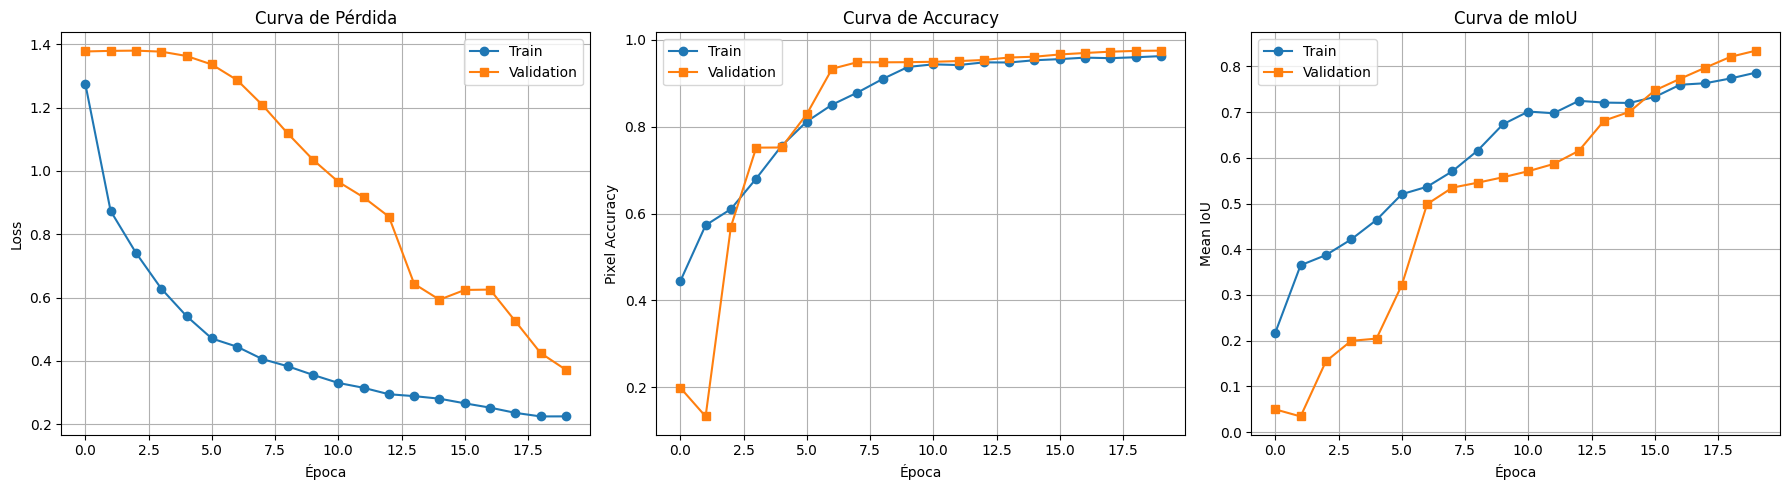

✅ Curvas de entrenamiento guardadas en: training_curves.png


In [15]:
# ============================================================================
# CELDA 6: BUCLE PRINCIPAL DE ENTRENAMIENTO
# ============================================================================
import torch
import gc

# Limpiar basura de Python
gc.collect()

# Limpiar caché de la GPU
torch.cuda.empty_cache()
# Historial de métricas
history = {
    'train_loss': [],
    'train_acc': [],
    'train_miou': [],
    'val_loss': [],
    'val_acc': [],
    'val_miou': []
}

best_val_loss = float('inf')
best_epoch = 0

print(f"\n🚀 Iniciando entrenamiento por {NUM_EPOCHS} épocas...\n")

for epoch in range(NUM_EPOCHS):
    print(f"{'='*70}")
    print(f"Época {epoch + 1}/{NUM_EPOCHS}")
    print(f"{'='*70}")
    
    # Entrenamiento
    train_metrics = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
    
    # Validación
    val_metrics = validate_epoch(model, val_loader, criterion, DEVICE)
    
    # Actualizar scheduler
    scheduler.step(val_metrics['loss'])
    
    # Guardar historial
    history['train_loss'].append(train_metrics['loss'])
    history['train_acc'].append(train_metrics['accuracy'])
    history['train_miou'].append(train_metrics['mIoU'])
    history['val_loss'].append(val_metrics['loss'])
    history['val_acc'].append(val_metrics['accuracy'])
    history['val_miou'].append(val_metrics['mIoU'])
    
    # Imprimir resumen de época
    print(f"\n📊 Resumen Época {epoch + 1}:")
    print(f"   Train - Loss: {train_metrics['loss']:.4f}, "
          f"Acc: {train_metrics['accuracy']:.4f}, "
          f"mIoU: {train_metrics['mIoU']:.4f}")
    print(f"   Val   - Loss: {val_metrics['loss']:.4f}, "
          f"Acc: {val_metrics['accuracy']:.4f}, "
          f"mIoU: {val_metrics['mIoU']:.4f}")
    
    # Guardar mejor modelo
    if val_metrics['loss'] < best_val_loss:
        best_val_loss = val_metrics['loss']
        best_epoch = epoch + 1
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"   ✅ Mejor modelo guardado! (Val Loss: {best_val_loss:.4f})")
    
    print()

print(f"\n{'='*70}")
print(f"🎉 Entrenamiento completado!")
print(f"{'='*70}")
print(f"Mejor modelo: Época {best_epoch} (Val Loss: {best_val_loss:.4f})")
print(f"Modelo guardado en: best_model.pth")


# Graficar curvas de entrenamiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pérdida
axes[0].plot(history['train_loss'], label='Train', marker='o')
axes[0].plot(history['val_loss'], label='Validation', marker='s')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].set_title('Curva de Pérdida')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(history['train_acc'], label='Train', marker='o')
axes[1].plot(history['val_acc'], label='Validation', marker='s')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Pixel Accuracy')
axes[1].set_title('Curva de Accuracy')
axes[1].legend()
axes[1].grid(True)

# mIoU
axes[2].plot(history['train_miou'], label='Train', marker='o')
axes[2].plot(history['val_miou'], label='Validation', marker='s')
axes[2].set_xlabel('Época')
axes[2].set_ylabel('Mean IoU')
axes[2].set_title('Curva de mIoU')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150)
plt.show()

print("✅ Curvas de entrenamiento guardadas en: training_curves.png")



🖼️ Generando visualizaciones...


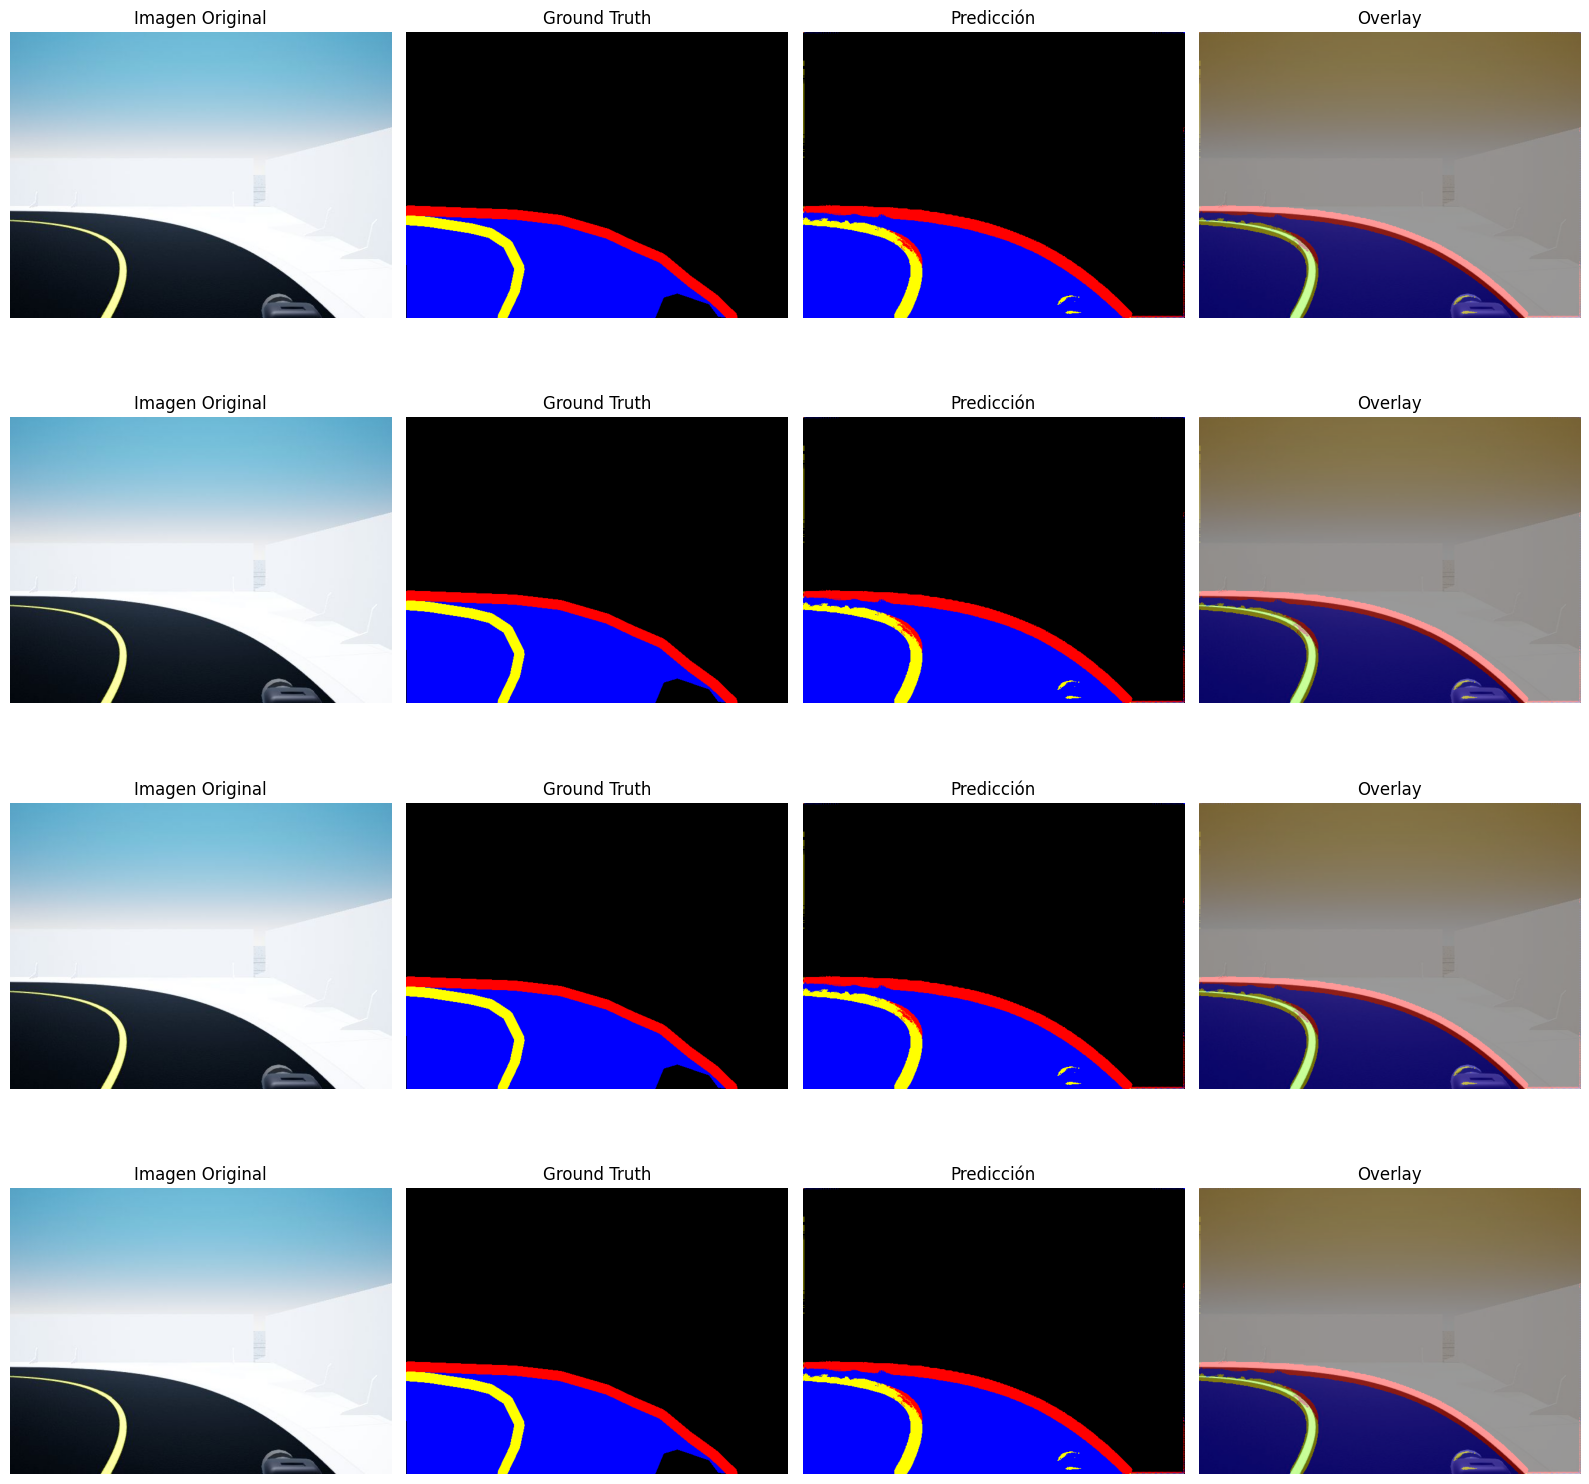

✅ Visualizaciones guardadas en: predictions_visualization.png


In [20]:
# ============================================================================
# CELDA 7: VISUALIZACIÓN DE RESULTADOS
# ============================================================================

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Colores para cada clase (BGR para OpenCV)
COLORS = {
    0: (0, 0, 0),       # Fondo/Vereda/Obstáculos - Negro
    1: (255, 0, 0),     # Camino/Asfalto - Azul
    2: (0, 255, 255),   # Líneas - Amarillo
    3: (0, 0, 255)      # Bordes - Rojo
}


def mask_to_color(mask, colors=COLORS):
    """Convierte máscara de clases a imagen RGB coloreada."""
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    
    for class_id, color in colors.items():
        color_mask[mask == class_id] = color
    
    return color_mask


def visualize_predictions(model, dataset, device, num_samples=4):
    """Visualiza predicciones del modelo vs ground truth."""
    model.eval()
    
    indices = np.random.choice(len(dataset), num_samples, replace=True)
    
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4 * num_samples))
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, mask = dataset[idx]
            
            # Predicción
            image_tensor = image.unsqueeze(0).to(device)
            output = model(image_tensor)
            pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()
            
            # Convertir imagen para visualización
            image_np = image.permute(1, 2, 0).numpy()
            image_np = (image_np * 255).astype(np.uint8)
            
            # Máscaras coloreadas
            mask_np = mask.numpy()
            gt_colored = mask_to_color(mask_np)
            pred_colored = mask_to_color(pred_mask)
            
            # Overlay de predicción sobre imagen
            overlay = cv2.addWeighted(image_np, 0.6, pred_colored, 0.4, 0)
            
            # Mostrar
            axes[i, 0].imshow(image_np)
            axes[i, 0].set_title('Imagen Original')
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(cv2.cvtColor(gt_colored, cv2.COLOR_BGR2RGB))
            axes[i, 1].set_title('Ground Truth')
            axes[i, 1].axis('off')
            
            axes[i, 2].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
            axes[i, 2].set_title('Predicción')
            axes[i, 2].axis('off')
            
            axes[i, 3].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
            axes[i, 3].set_title('Overlay')
            axes[i, 3].axis('off')
    
    plt.tight_layout()
    plt.savefig('predictions_visualization.png', dpi=150)
    plt.show()
    
    print("✅ Visualizaciones guardadas en: predictions_visualization.png")


# Visualizar predicciones en conjunto de validación
print("\n🖼️ Generando visualizaciones...")
visualize_predictions(model, val_dataset, DEVICE, num_samples=4)


🔎 Analizando imagen...


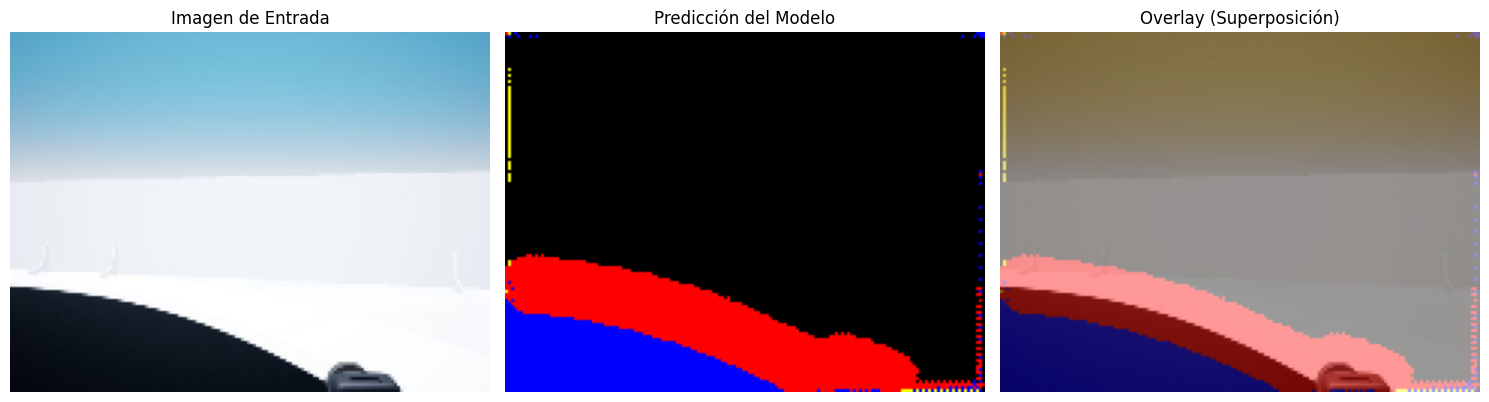

✅ Inferencia completada para: qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/img_1768882921767.png


In [22]:
# ============================================================================
# CELDA 8: PRUEBA CON IMAGEN PROPIA (INFERENCIA)
# ============================================================================
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# ---------------- CONFIGURACIÓN ----------------
# 1. Pon aquí la ruta de tu imagen (puede ser jpg, png, etc.)
#IMAGE_PATH = "qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/img_1768882865876.png" 
IMAGE_PATH = "qcar2_LaneSeg-ACC/train_unet/training_data/raw_images/img_1768882921767.png"
# 2. IMPORTANTE: Pon el mismo tamaño que usaste en el entrenamiento (Ancho, Alto)
# Si no recuerdas, revisa tu dataset. Si usaste 160x120, pon (160, 120)
TARGET_SIZE = (160, 120) 
# -----------------------------------------------

def predict_custom_image(image_path, model, device, target_size):
    """
    Carga una imagen, la procesa y muestra la segmentación.
    """
    # 1. Verificar si existe la imagen
    if not os.path.exists(image_path):
        print(f"❌ Error: No se encontró la imagen en: {image_path}")
        return

    # 2. Cargar y Preprocesar imagen
    # Lectura con OpenCV
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Redimensionar al tamaño que espera el modelo
    image_resized = cv2.resize(image_rgb, target_size)
    
    # Normalizar (0-255 -> 0-1) y convertir a Tensor
    # De (H, W, C) -> (C, H, W)
    image_tensor = torch.from_numpy(image_resized).permute(2, 0, 1).float() / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device) # Añadir dimensión de batch (1, C, H, W)

    # 3. Inferencia
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        # Obtener la clase con mayor probabilidad para cada pixel
        pred_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

    # 4. Visualización
    # Convertir imagen original para mostrar (ya está en RGB y resize)
    image_display = image_resized.astype(np.uint8)
    
    # Colorear la máscara predicha
    pred_colored = mask_to_color(pred_mask) # Usa la función definida en la celda anterior
    
    # Crear Overlay
    overlay = cv2.addWeighted(image_display, 0.6, pred_colored, 0.4, 0)

    # Graficar
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Imagen Original
    axes[0].imshow(image_display)
    axes[0].set_title('Imagen de Entrada')
    axes[0].axis('off')
    
    # Máscara Predicha (Segmentación pura)
    axes[1].imshow(cv2.cvtColor(pred_colored, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Predicción del Modelo')
    axes[1].axis('off')
    
    # Overlay (Superposición)
    axes[2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Overlay (Superposición)')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()
    print(f"✅ Inferencia completada para: {image_path}")

# Ejecutar la prueba
# Asegúrate de haber definido COLORS y mask_to_color en la celda anterior
print(f"🔎 Analizando imagen...")
predict_custom_image(IMAGE_PATH, model, DEVICE, TARGET_SIZE)

In [23]:
# ============================================================================
# CELDA 8: EXPORTACIÓN A ONNX
# ============================================================================

print("\n📦 Exportando modelo a formato ONNX...")

# Cargar mejor modelo
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
model.to(DEVICE)

# Crear tensor de entrada dummy (batch_size=1, canales=3, H=480, W=640)
dummy_input = torch.randn(1, 3, IMAGE_HEIGHT, IMAGE_WIDTH).to(DEVICE)

# Nombre del archivo ONNX
onnx_path = 'lane_unet.onnx'

# Exportar a ONNX
torch.onnx.export(
    model,                          # Modelo a exportar
    dummy_input,                    # Entrada de ejemplo
    onnx_path,                      # Ruta de salida
    export_params=True,             # Exportar parámetros entrenados
    opset_version=11,               # Versión ONNX (compatible con Isaac ROS)
    do_constant_folding=True,       # Optimización
    input_names=['input_tensor'],   # Nombre del tensor de entrada
    output_names=['output_tensor'], # Nombre del tensor de salida
    dynamic_axes={                  # Ejes dinámicos (batch size variable)
        'input_tensor': {0: 'batch_size'},
        'output_tensor': {0: 'batch_size'}
    }
)

print(f"✅ Modelo exportado exitosamente a: {onnx_path}")
print(f"\nEspecificaciones del modelo ONNX:")
print(f"   - Input shape: (batch_size, 3, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Output shape: (batch_size, {NUM_CLASSES}, {IMAGE_HEIGHT}, {IMAGE_WIDTH})")
print(f"   - Input name: 'input_tensor'")
print(f"   - Output name: 'output_tensor'")
print(f"   - Opset version: 11")
print(f"\n🎯 Listo para Isaac ROS!")


# Verificar archivo ONNX (opcional, requiere onnx library)
try:
    import onnx
    
    onnx_model = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model)
    
    print("\n✅ Verificación ONNX exitosa:")
    print(f"   - Archivo válido")
    print(f"   - Tamaño: {os.path.getsize(onnx_path) / (1024*1024):.2f} MB")
    
except ImportError:
    print("\n⚠️ onnx library no instalada, saltando verificación")
    print("   Para verificar: pip install onnx")


print("\n" + "="*70)
print("✨ PROCESO COMPLETADO ✨")
print("="*70)
print("\nArchivos generados:")
print("  ✓ best_model.pth - Modelo PyTorch entrenado")
print("  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS")
print("  ✓ training_curves.png - Curvas de entrenamiento")
print("  ✓ predictions_visualization.png - Visualizaciones de predicciones")
print("\nPróximos pasos:")
print("  1. Validar modelo ONNX con TensorRT")
print("  2. Integrar con Isaac ROS")
print("  3. Probar en QCar2")



📦 Exportando modelo a formato ONNX...
✅ Modelo exportado exitosamente a: lane_unet.onnx

Especificaciones del modelo ONNX:
   - Input shape: (batch_size, 3, 480, 640)
   - Output shape: (batch_size, 4, 480, 640)
   - Input name: 'input_tensor'
   - Output name: 'output_tensor'
   - Opset version: 11

🎯 Listo para Isaac ROS!

✅ Verificación ONNX exitosa:
   - Archivo válido
   - Tamaño: 50.74 MB

✨ PROCESO COMPLETADO ✨

Archivos generados:
  ✓ best_model.pth - Modelo PyTorch entrenado
  ✓ lane_unet.onnx - Modelo ONNX para Isaac ROS
  ✓ training_curves.png - Curvas de entrenamiento
  ✓ predictions_visualization.png - Visualizaciones de predicciones

Próximos pasos:
  1. Validar modelo ONNX con TensorRT
  2. Integrar con Isaac ROS
  3. Probar en QCar2
